In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame

In [4]:
# 读取航班原始数据
df = pd.read_csv('/Users/chandler/Desktop/test_data/work/usa_flights.csv')

In [5]:
# 查看数据大小
df.shape

(201664, 14)

In [6]:
df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0


In [7]:
# 获取延误时间最长top10
df.sort_values('arr_delay',ascending=False)[:10]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,11/01/2015 0:00,AA,1595,AUS,DFW,1444.0,0,190,1444.0,0.0,0.0,0.0,0.0,59.0
10214,13/01/2015 0:00,AA,1487,OMA,DFW,1392.0,0,583,1392.0,0.0,0.0,0.0,0.0,117.0
12430,03/01/2015 0:00,AA,1677,MEM,DFW,1384.0,0,432,1380.0,0.0,0.0,4.0,0.0,104.0
8443,04/01/2015 0:00,AA,1279,OMA,DFW,1237.0,0,583,1222.0,0.0,15.0,0.0,0.0,102.0
10328,05/01/2015 0:00,AA,1495,EGE,DFW,1187.0,0,721,1019.0,0.0,168.0,0.0,0.0,127.0
36570,04/01/2015 0:00,DL,1435,MIA,MSP,1174.0,0,1501,1174.0,0.0,0.0,0.0,0.0,231.0
36495,04/01/2015 0:00,DL,1367,ROC,ATL,1138.0,0,749,1112.0,0.0,0.0,26.0,0.0,171.0
59072,14/01/2015 0:00,DL,1687,SAN,MSP,1084.0,0,1532,1070.0,0.0,0.0,14.0,0.0,240.0
32173,05/01/2015 0:00,AA,970,LAS,LAX,1042.0,0,236,1033.0,0.0,9.0,0.0,0.0,66.0
56488,12/01/2015 0:00,DL,2117,ATL,COS,1016.0,0,1184,1016.0,0.0,0.0,0.0,0.0,193.0


# 计算延误和没有延误所占比例

In [8]:
df['cancelled'].value_counts()

0    196873
1      4791
Name: cancelled, dtype: int64

In [9]:
df['delay'] = df['arr_delay'].apply(lambda x: x>0)

In [10]:
df.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delay
0,02/01/2015 0:00,AA,1,JFK,LAX,-19.0,0,2475,NaN,NaN,NaN,NaN,NaN,381.0,False
1,03/01/2015 0:00,AA,1,JFK,LAX,-39.0,0,2475,NaN,NaN,NaN,NaN,NaN,358.0,False
2,04/01/2015 0:00,AA,1,JFK,LAX,-12.0,0,2475,NaN,NaN,NaN,NaN,NaN,385.0,False
3,05/01/2015 0:00,AA,1,JFK,LAX,-8.0,0,2475,NaN,NaN,NaN,NaN,NaN,389.0,False
4,06/01/2015 0:00,AA,1,JFK,LAX,25.0,0,2475,0.0,0.0,0.0,25.0,0.0,424.0,True


In [11]:
delay_data = df['delay'].value_counts()

In [12]:
delay_data.index

Index([False, True], dtype='object')

In [13]:
delay_data[1]/(delay_data[1] + delay_data[0])

0.48906597112027927

In [14]:
delay_group = df.groupby(['unique_carrier', 'delay'])

In [15]:
delay_group

In [16]:
delay_group.size()

unique_carrier  delay
AA              False     8912
                True      9841
AS              False     3527
                True      2104
B6              False     4832
                True      4401
DL              False    17719
                True      9803
EV              False    10596
                True     11371
F9              False     1103
                True      1848
HA              False     1351
                True      1354
MQ              False     4692
                True      8060
NK              False     1550
                True      2133
OO              False     9977
                True     10804
UA              False     7885
                True      8624
US              False     7850
                True      6353
VX              False     1254
                True       781
WN              False    21789
                True     21150
dtype: int64

In [17]:
df_delay = delay_group.size().unstack()

In [18]:
df_delay

delay,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


In [19]:
import matplotlib.pyplot as plt

In [20]:
df_delay.plot()

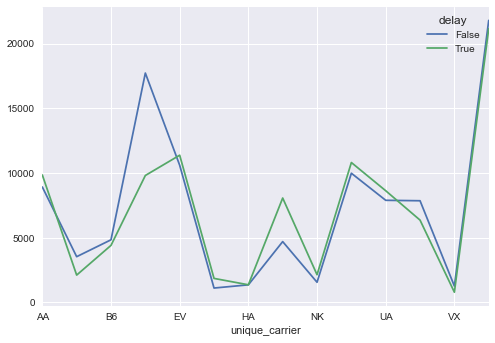

In [21]:
plt.show()

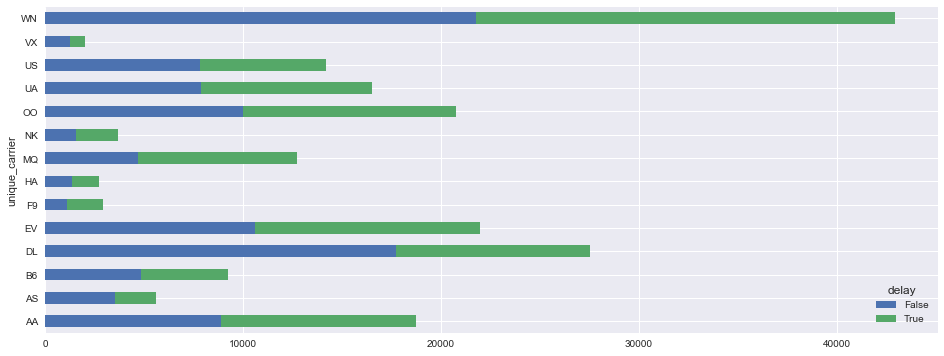

In [29]:
df_delay.plot(kind='barh', stacked=True, figsize=[16,6])
plt.show()

In [23]:
flight_by_carrier = df.pivot_table(index='flight_date', 
                                   columns='unique_carrier',
                                   values='flight_num',
                                   aggfunc='count')

In [24]:
flight_by_carrier

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
02/01/2015 0:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
03/01/2015 0:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
04/01/2015 0:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
05/01/2015 0:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
06/01/2015 0:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396
07/01/2015 0:00,1420,419,694,2107,1705,228,208,998,284,1557,1259,1143,151,3398
08/01/2015 0:00,1447,444,731,2214,1759,224,208,1009,284,1625,1331,1171,164,3398
09/01/2015 0:00,1448,447,730,2204,1767,229,222,1010,289,1631,1331,1169,167,3364
10/01/2015 0:00,1285,412,641,1584,1133,168,201,768,285,1270,908,912,109,2668


In [25]:
flight_by_carrier['AA']

flight_date
02/01/2015 0:00    1545
03/01/2015 0:00    1453
04/01/2015 0:00    1534
05/01/2015 0:00    1532
06/01/2015 0:00    1400
07/01/2015 0:00    1420
08/01/2015 0:00    1447
09/01/2015 0:00    1448
10/01/2015 0:00    1285
11/01/2015 0:00    1426
12/01/2015 0:00    1445
13/01/2015 0:00    1404
14/01/2015 0:00    1414
Name: AA, dtype: int64

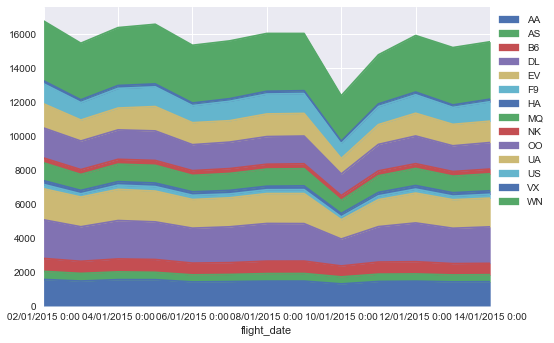

In [28]:
flight_by_carrier.plot(kind='area', stacked=True)
plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))
plt.show()

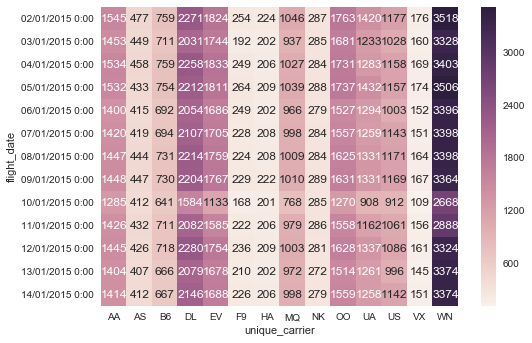

In [27]:
sns.heatmap(flight_by_carrier, annot=True, fmt='d')
plt.show()

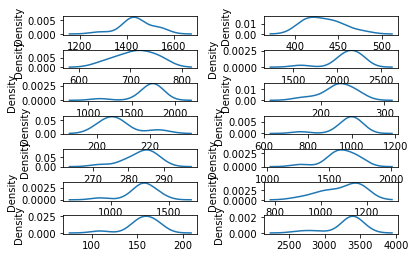

In [151]:
figure,ax = plt.subplots(7,2)
flight_by_carrier['AA'].plot(ax=ax[0][0],kind='kde')
flight_by_carrier['AS'].plot(ax=ax[0][1],kind='kde')
flight_by_carrier['B6'].plot(ax=ax[1][0],kind='kde')
flight_by_carrier['DL'].plot(ax=ax[1][1],kind='kde')
flight_by_carrier['EV'].plot(ax=ax[2][0],kind='kde')
flight_by_carrier['F9'].plot(ax=ax[2][1],kind='kde')
flight_by_carrier['HA'].plot(ax=ax[3][0],kind='kde')
flight_by_carrier['MQ'].plot(ax=ax[3][1],kind='kde')
flight_by_carrier['NK'].plot(ax=ax[4][0],kind='kde')
flight_by_carrier['OO'].plot(ax=ax[4][1],kind='kde')
flight_by_carrier['UA'].plot(ax=ax[5][0],kind='kde')
flight_by_carrier['US'].plot(ax=ax[5][1],kind='kde')
flight_by_carrier['VX'].plot(ax=ax[6][0],kind='kde')
flight_by_carrier['WN'].plot(ax=ax[6][1],kind='kde')
figure.subplots_adjust(wspace=0.5,hspace=0.8)
plt.show()

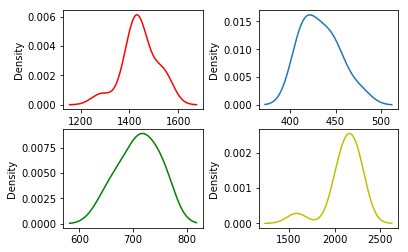

In [167]:
figure,ax = plt.subplots(2,2)
flight_by_carrier['AA'].plot(ax=ax[0][0],kind='kde',style='r')
flight_by_carrier['AS'].plot(ax=ax[0][1],kind='kde')
flight_by_carrier['B6'].plot(ax=ax[1][0],kind='kde',style='g')
flight_by_carrier['DL'].plot(ax=ax[1][1],kind='kde',style='y')
figure.subplots_adjust(wspace=0.4,hspace=0.2)
plt.show()

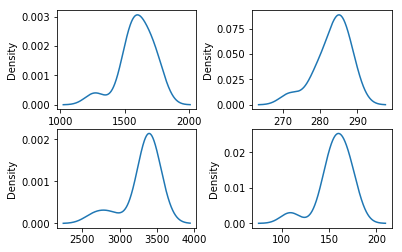

In [173]:
figure,ax = plt.subplots(2,2)
flight_by_carrier['OO'].plot(ax=ax[0][0],kind='kde')
flight_by_carrier['NK'].plot(ax=ax[0][1],kind='kde')
flight_by_carrier['WN'].plot(ax=ax[1][0],kind='kde')
flight_by_carrier['VX'].plot(ax=ax[1][1],kind='kde')
figure.subplots_adjust(wspace=0.4,hspace=0.2)
plt.show()

In [31]:
flight_by_distance = df.pivot_table(index='flight_date', 
                                   columns='unique_carrier',
                                   values='distance',
                                   aggfunc='sum')

In [32]:
flight_by_distance

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
02/01/2015 0:00,1699038,570954,836774,2172782,906788,232900,142278,459462,284177,878151,1977888,1133594,257072,2506998
03/01/2015 0:00,1601816,555830,782710,1985181,864453,181151,128800,409048,282075,859170,1734255,1056571,239517,2419020
04/01/2015 0:00,1696926,552796,835449,2151059,900245,226877,134756,450034,281260,875444,1786053,1117245,249211,2446891
05/01/2015 0:00,1689255,512418,818990,1889910,893875,240933,132698,453845,286556,855229,1973936,1073261,254532,2497642
06/01/2015 0:00,1492323,478247,712457,1705862,782841,222578,124488,415075,280839,727801,1593621,829413,219239,2423881
07/01/2015 0:00,1510004,492639,715188,1753743,790767,218907,135536,432997,283786,734440,1555124,971680,217390,2425658
08/01/2015 0:00,1552740,528986,780972,1873343,814842,211032,125450,436846,282288,776407,1633227,1018652,234114,2425658
09/01/2015 0:00,1549451,532292,781939,1875917,816601,218018,137306,437488,287575,781194,1631010,1012330,235222,2406884
10/01/2015 0:00,1404530,498490,667828,1432841,508405,169107,126314,325468,285181,609820,1209570,866718,156738,1994134


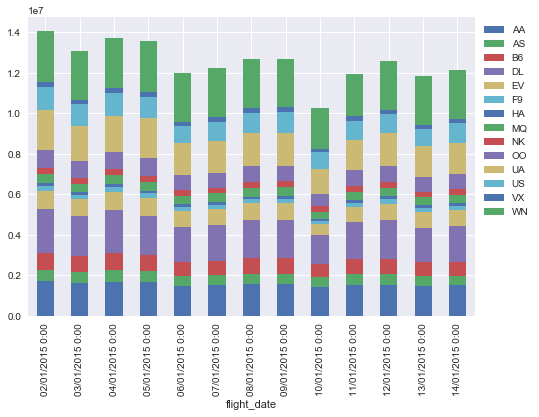

In [33]:
flight_by_distance.plot(kind='bar', stacked=True)
plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))
plt.show()

In [34]:
flight_by_time = df.pivot_table(index='flight_date', 
                                   columns='unique_carrier',
                                   values='actual_elapsed_time',
                                   aggfunc='mean')

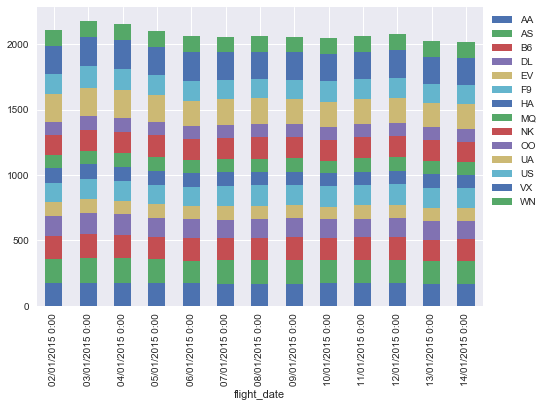

In [35]:
flight_by_time.plot(kind='bar', stacked=True)
plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))
plt.show()

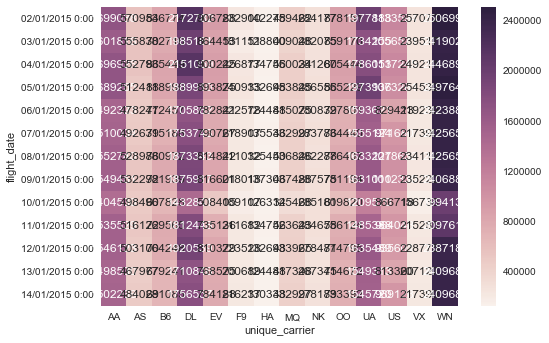

In [37]:
sns.heatmap(flight_by_distance, annot=True, fmt='d')
plt.show()